---
"tags": ["Python", "algorithmique", "Recherche des k plus proche voisins"]
---

::: programme
+--------------------------+-----------------------------------+-------------------------------------+
|         Contenus         |        Capacités attendues        |            Commentaires             |
+==========================+===================================+=====================================+
| Algorithme des k plus    | Écrire un algorithme qui prédit   | Il s’agit d’un exemple d’algorithme |
| proches voisins          | la classe d’un élément en         | d’apprentissage.                    |
|                          | fonction de la classe majoritaire |                                     |
|                          | de ses k plus proches voisins.    |                                     |
+--------------------------+-----------------------------------+-------------------------------------+
:::

Dans ce chapitre nous abordons un algorithme dit d’**apprentissage automatique** qui permet à un programme d’apprendre à classer des « objets » en utilisant un jeu de données pour qu’il y trouve des similarités.

C’est un algorithme simple de *« machine learning »* un sujet très en vogue à l’heure actuelle dans le domaine de l’informatique.


## Principe

### Principe de l'apprentissage supervisé

A l'heure actuelle, l'intelligence artificielle se base souvent sur l'utilisation de données annotées que l'on fournit à l'ordinateur pour qu'il y trouve des similarités(c'est ce que l'on appele de l'apprentissage supervisé).

::: example
On peut fournir à un programme une grande quantité d'écritures de chiffres.

Le programme va lire toutes les données, et grâce à des algorithmes plus ou moins évolués, le programme va trouver les points communs entre les chiffres représentant le même nombre.
<a title="Josef Steppan / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"></a>

Ensuite, on peut donner au programme une image non annotée, et il nous dira s'il s'agit d'un 1, d'un 6 ou d'un 8...

C'est un système qui est utilisé depuis des années pour la lecture des codes postaux sur les lettres avec un efficacité supérieure à 99%.
:::


### Principe l'algorithme des k plus proches voisins

On dispose d'une collection de données annotées, et on veut savoir à quelle catégorie appartient un nouvel échantillon. Il s'agit d'un problème de **classification**.

Prenons l'exemple suivant issu de cette [page](https://nadjarebinguet.wordpress.com/2020/03/20/algorithme-des-k-plus-proches-voisins/).

> Imaginons… On étudie des papillons. Ceux-ci ont une certaine largeur et une certaine longueur. Certains sont des males, d’autres des femelles.
>
> On étudie un certain nombre de ces papillons. Cela constitue un jeu d’apprentissage dont les caractéristiques sont représentées ci-dessous.
>
> A partir de ce jeu d’apprentissage, on cherche à prédire le sexe d’un papillon dont on connaît les dimensions.

>![Classification des papillons](./img/geogebra-papillons.png)

> L’objectif est maintenant d’identifier le sexe d’un nouveau papillon en s’appuyant sur notre expérience précédente.
>
> **Le principe est simple : On fait l’hypothèse que notre papillon a le même sexe que ces voisins.**

On voit par exemple que le voisin le plus proche est un paillon mâle:

![k=1](./img/geogebra-1voisin.png)

Cependant la particularité de l'algorithme des k plus proches voisins est le fait que l'on puisse choisir $k$, le nombre de plus proches voisins nous permettant de faire notre choix, on va prendre plusieurs voisins pour éviter de se baser que sur une observation pour notre choix.

Voici par exemple l'application pour $k=5$:

![k=5](./img/geogebra-5-voisins.png)
 
::: {.appli titre='Influence du nombre de voisins'}
En utilisant ce fichier [geogebra](https://www.geogebra.org/m/zhbhycsh) montrer comment le choix de $k$ a une influence sur la prévision de la méthode.

:::

## Implémentation naïve en Python

Le code qui suit utilise des méthodes de `pandas` `matplotlib` et `numpy` non vues, il n'est pas nécessaire de savoir le refaire, par contre en utilisant les commentaires vous pouvez voir comment est effctuée la classification dans cet implémentation.


### Classification d'élèves en conseil de classe

Nous allons utiliser un fichier `csv` qui contient les *moyennes, absences et mentions d'élèves de lycée*.

Vous pouvez visualiser ce fichier ici: https://framagit.org/eduinfo/k-plus-proches-voisins/blob/master/data/mentions-anonymised.csv

A partir de ce fichier de données **l'algorithme sera capable de vous indiquer quelle sera votre mention (Félicitations, compliments...)** en fonction de notre moyenne générale et notre nombre d'absences.

### Tracé de la classification

Commencons par observer l'ensemble des données sous forme graphique pour se faire une idée.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# données du conseil de classe 
df = pd.read_csv('./data/mentions-anonymised.csv')

# On affiche 3 échantillons du tableau
df.sample(3)


,Mentions,1/2j abs,Rang,Moyenne Générale,PHILOSOPHIE,HISTOIRE-GEOGRAPHIE,MATHEMATIQUES,PHYSIQUE-CHIMIE,SCIENCES VIE & TERRE,ED.PHYSIQUE & SPORT.,...,ESPAGNOL LV2,ITALIEN LV2,JAPONAIS LV2,SPECIALITE SVT,SPECIALITE PHYS,NISSART LV3,SPECIALITE MATHS,SPECIALITE ISN,arts fac,ENS. MORAL & CIVIQUE
59,Encouragements,16.0,20.0,12.1,13.5,NaN,12.4,9.0,11.0,18.0,...,NaN,12.1,NaN,NaN,NaN,N.Not,13.7,NaN,NaN,NaN
9,Félicitations,9.0,3.0,17.8,18.5,18.5,18.9,20.0,17.6,12.0,...,NaN,17.3,NaN,NaN,16.3,18.7,NaN,NaN,NaN,NaN
68,Encouragements,2.0,24.0,12.3,13.7,12.5,12.4,11.5,12.0,15.5,...,NaN,14.5,NaN,11.1,NaN,16.9,NaN,NaN,NaN,14.0


In [3]:
# on ne conserve que 3 colonnes pour cette étude simplifiée
df =  df.loc[:, ['Moyenne Générale', '1/2j abs', 'Mentions']]
df

,Moyenne Générale,1/2j abs,Mentions
0,17.4,3.0,Félicitations
1,18.1,5.0,Félicitations
2,18.2,NaN,Félicitations
3,17.0,1.0,Félicitations
4,17.6,2.0,Félicitations
...,...,...,...
91,9.0,12.0,Encouragements
92,9.4,14.0,Pas de mention
93,7.7,49.0,Pas de mention
94,12.3,32.0,Pas de mention


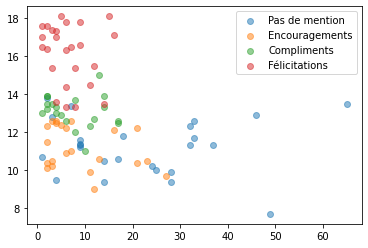

In [4]:
def tracé_graph():
    for mention in ["Pas de mention","Encouragements", "Compliments", "Félicitations"]:
        df_mention = df.loc[df["Mentions"] == mention]
        plt.scatter(df_mention["1/2j abs"], df_mention["Moyenne Générale"], label=mention, alpha=0.5)
    plt.legend()
tracé_graph()

On voit bien le groupe des **Félicitations** se dégager avec des hautes notes et peu d'absences, ainsi que le groupe **Pas de mention** pour les absentéistes. Par contre la zone basse du graphique présente de nombreux points de divers mentions proches. 

### Implémentation de l'algorithme

Nous allons maintenant définir la fonction qui à partie de la moyenne et des absences données en argument renverra la mention des k plus proches voisins(par défaut: 3).

In [5]:
def k_plus_proches_voisins(moyenne, absences, k=3):
    """Renvoie la classe des k plus proches voisins
    
    Entrée:
        moyenne: moyenne de l'élève
        absences: nb de 1/2j d'absences lors du trimestre
        k: nombre de voisins les plus proches à utiliser(par défaut 3)
        
    Sortie:
        renvoie les classe la plus probable des k plus porches voisins"""
    
    # on commence par afficher notre point sur un graphique
    plt.scatter(absences, moyenne, label="Elève étudié", marker="P")
    
    # on crée une liste pour stocker les distances euclidiennes
    df['distance'] = df.apply(lambda row: ((row["Moyenne Générale"] - moyenne)**2 + (row["1/2j abs"] - absences)**2)**0.5, axis=1)
    # On affiche les trois plus courtes distances
    df_voisins = df.iloc[df.distance.sort_values().index[:k]]
    print(df_voisins)
    # on les marque sur le graph
    plt.scatter(df_voisins["1/2j abs"],
                df_voisins["Moyenne Générale"],
                label="Plus proches voisins", marker="*")
    # On ajoute tous les autres points
    tracé_graph()
    return df_voisins["Mentions"].value_counts().nlargest(1)

### Appels de la fonction

    Moyenne Générale  1/2j abs        Mentions  distance
32              12.3      11.0     Compliments  1.019804
62              11.6       9.0  Pas de mention  1.345362
66              11.4       9.0  Pas de mention  1.486607


Pas de mention    2
Name: Mentions, dtype: int64

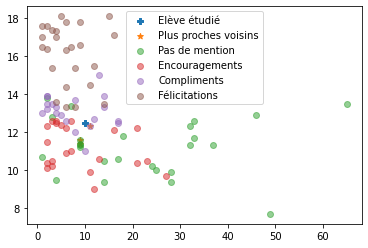

In [6]:
k_plus_proches_voisins(12.5, 10)

On observe donc que l'élève n'aurait pas de mention malgré ses 12.5 de moyenne, Voyons ce qu'il en est si on réduit le nombre d'absences à 5.

    Moyenne Générale  1/2j abs        Mentions  distance
65              12.4       5.0  Encouragements       0.1
46              12.9       5.0     Compliments       0.4
58              12.5       4.0  Encouragements       1.0


Encouragements    2
Name: Mentions, dtype: int64

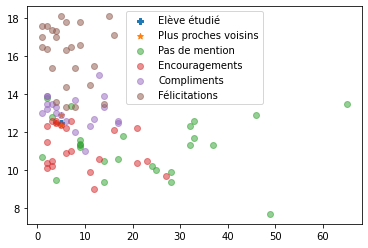

In [7]:
k_plus_proches_voisins(12.5, 5)

L'élève a maintenant les encouragements.

### Et vous, quelle serait votre mention?

L'algorithme et les données sont en ligne dans le dépôt suivant:

https://framagit.org/eduinfo/k-plus-proches-voisins

Vous pouvez *soit* télécharger le [dossier](https://framagit.org/eduinfo/k-plus-proches-voisins/archive/master.zip) pour travailler sur le code sur votre machine si vous avaez installé python et anconda chez vous.

Vous pouvez sinon travailler en ligne en lancant un environment [![Binder](http://mybinder.org/badge_logo.svg)](http://mybinder.org/v2/gh/heoinfo/k-plus-proches-voisins/master?filepath=index.ipynb).

::: {.appli titre="L’algorithme est-il efficace?"}
Reprendre vos bulletins de lycée pour vérifier si la prévision faite à partir de votre moyenne générale et de votre nombre de jours d'absences est conforme au résultat obtenu.

Vous pouvez éventuellement changer la valeur de $k$ pour améliorer les prédictions.

**Pour conclure:** Que diriez-vous de cette méthode? Peut-on vraiment qualifier cet algorithme d'*intelligence artificielle*? Voyez-vous des dangers à la prise de décisions par des algorithmes?

:::


## Notes sur l'algorithme

Cet algorithme(*brute-force*) est peu efficace avec une complexité de $O[D N^2]$(voir [doc sklearn](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms)).

D'autres part, il serait bon de mettre à l'échelle les données utilisées, car on voit bien que l'échelle des absences est trois fois plus grande que les moyennes, et ainsi a un importance accrue dans le calcul de la distance des voisins.

## Références

- Cours de Nadja Rebinguet duquel est extrait l'exemple des papillons: https://nadjarebinguet.wordpress.com/2020/03/20/algorithme-des-k-plus-proches-voisins/

- Cette video de [Phillippe Bouchery sur le machine learning](https://www.youtube.com/watch?v=OEJX-q6UOag)

- Cours sur pixees.fr: https://pixees.fr/informatiquelycee/n_site/nsi_prem_knn.html
        
- Article Wikipedia: https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins
        
- Doc sklearn: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms
